<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Statsmodels" data-toc-modified-id="Statsmodels-1">Statsmodels</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Just-poll_changed" data-toc-modified-id="Just-poll_changed-1.0.1">Just poll_changed</a></span><ul class="toc-item"><li><span><a href="#0.3-miles" data-toc-modified-id="0.3-miles-1.0.1.1">0.3 miles</a></span></li></ul></li><li><span><a href="#With-poll_changed-and-farther/closer" data-toc-modified-id="With-poll_changed-and-farther/closer-1.0.2">With poll_changed and farther/closer</a></span><ul class="toc-item"><li><span><a href="#0.3-miles" data-toc-modified-id="0.3-miles-1.0.2.1">0.3 miles</a></span></li></ul></li></ul></li><li><span><a href="#Donut-approach" data-toc-modified-id="Donut-approach-1.1">Donut approach</a></span><ul class="toc-item"><li><span><a href="#Just-poll_changed" data-toc-modified-id="Just-poll_changed-1.1.1">Just poll_changed</a></span></li><li><span><a href="#Poll_changed-and-farther/closer" data-toc-modified-id="Poll_changed-and-farther/closer-1.1.2">Poll_changed and farther/closer</a></span></li></ul></li><li><span><a href="#Absentee" data-toc-modified-id="Absentee-1.2">Absentee</a></span></li><li><span><a href="#In-person-voting-as-outcome" data-toc-modified-id="In-person-voting-as-outcome-1.3">In-person voting as outcome</a></span><ul class="toc-item"><li><span><a href="#Just-poll_changed" data-toc-modified-id="Just-poll_changed-1.3.1">Just poll_changed</a></span></li><li><span><a href="#Poll_changed-and-farther/closer" data-toc-modified-id="Poll_changed-and-farther/closer-1.3.2">Poll_changed and farther/closer</a></span></li></ul></li><li><span><a href="#Race-analysis" data-toc-modified-id="Race-analysis-1.4">Race analysis</a></span><ul class="toc-item"><li><span><a href="#White-vs.-non-white-voters-(essentially-white-vs.-black-based-on-the-numbers)" data-toc-modified-id="White-vs.-non-white-voters-(essentially-white-vs.-black-based-on-the-numbers)-1.4.1">White vs. non-white voters (essentially white vs. black based on the numbers)</a></span><ul class="toc-item"><li><span><a href="#High-level--descriptives" data-toc-modified-id="High-level--descriptives-1.4.1.1">High-level  descriptives</a></span></li><li><span><a href="#HTE" data-toc-modified-id="HTE-1.4.1.2">HTE</a></span></li></ul></li><li><span><a href="#Donut-approach-with-minorities" data-toc-modified-id="Donut-approach-with-minorities-1.4.2">Donut approach with minorities</a></span><ul class="toc-item"><li><span><a href="#High-level-descriptives" data-toc-modified-id="High-level-descriptives-1.4.2.1">High-level descriptives</a></span></li></ul></li></ul></li><li><span><a href="#Checking-2012-data" data-toc-modified-id="Checking-2012-data-1.5">Checking 2012 data</a></span></li></ul></li></ul></div>

# Statsmodels

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.regression.linear_model as smlm

In [2]:
df = pd.read_csv('/Users/jakemainwaring/Desktop/data_for_viz/final_results.tsv', sep='\t')

In [3]:
print(len(df))
print(len(df['ncid'].unique()))
print(len(df[df['poll_changed']==1]))
print(len(df[np.abs(df['delta_dist'])>1]))

420797
124533
27020
9725


In [4]:
df.head(3)

,ncid,poll_changed,voted,delta_dist,voting_method,block
0,BH18756,0.0,1.0,0.0,ABSENTEE ONESTOP,0
1,BH18762,0.0,1.0,0.0,ABSENTEE ONESTOP,0
2,BH79589,0.0,1.0,0.0,ABSENTEE ONESTOP,0


In [5]:
df['is_closer'] = np.where(df['delta_dist'] < 0, 1, 0) 
df['is_farther'] = np.where(df['delta_dist'] > 0, 1, 0) 

### Just poll_changed

#### 0.3 miles

In [6]:
mod = smf.ols('voted ~ poll_changed', data=df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  voted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     52.65
Date:                Tue, 14 May 2019   Prob (F-statistic):           4.09e-13
Time:                        11:22:02   Log-Likelihood:            -1.7323e+05
No. Observations:              420797   AIC:                         3.465e+05
Df Residuals:                  420795   BIC:                         3.465e+05
Df Model:                           1                                         
Covariance Type:              cluster                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8426      0.001    723.122   

### With poll_changed and farther/closer

#### 0.3 miles

In [7]:
mod = smf.ols('voted ~ is_closer + is_farther', data=df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  voted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     31.28
Date:                Tue, 14 May 2019   Prob (F-statistic):           2.70e-14
Time:                        11:22:02   Log-Likelihood:            -1.7322e+05
No. Observations:              420797   AIC:                         3.464e+05
Df Residuals:                  420794   BIC:                         3.465e+05
Df Model:                           2                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8426      0.001    723.121      0.0

## Donut approach

This only looks at people whose polling place changed by >1 mile in either direction

In [8]:
# Filtering down
unique_blocks = df[np.abs(df['delta_dist']) > 1]['block'].unique()
donut_df = df[df['block'].isin(unique_blocks)]

In [9]:
donut_df['is_closer'] = np.where(donut_df['delta_dist'] < 0, 1, 0) 
donut_df['is_farther'] = np.where(donut_df['delta_dist'] > 0, 1, 0) 

/Users/jakemainwaring/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jakemainwaring/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Just poll_changed

In [10]:
mod = smf.ols('voted ~ poll_changed', data=donut_df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': donut_df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  voted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     25.69
Date:                Tue, 14 May 2019   Prob (F-statistic):           4.07e-07
Time:                        11:22:03   Log-Likelihood:                -66099.
No. Observations:              170740   AIC:                         1.322e+05
Df Residuals:                  170738   BIC:                         1.322e+05
Df Model:                           1                                         
Covariance Type:              cluster                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8518      0.001    655.750   

### Poll_changed and farther/closer

In [11]:
mod = smf.ols('voted ~ is_closer + is_farther', data=donut_df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': donut_df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  voted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     21.17
Date:                Tue, 14 May 2019   Prob (F-statistic):           6.70e-10
Time:                        11:22:03   Log-Likelihood:                -66088.
No. Observations:              170740   AIC:                         1.322e+05
Df Residuals:                  170737   BIC:                         1.322e+05
Df Model:                           2                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8518      0.001    655.748      0.0

## Absentee

Seeing if having one's polling place moved can predict whether someone will predict absentee

In [12]:
def is_absentee(vm):
    '''Takes voting method, recodes to 1 or 0'''
    if vm is np.nan:
        return 0
    elif vm in {'ABSENTEE ONESTOP', 'ABSENTEE BY MAIL', 'ABSENTEE CURBSIDE', 'ABSENTEE'}:
        return 1
    else: 
        return 0

In [13]:
df['is_absentee'] = df['voting_method'].apply(is_absentee)

In [14]:
mod = smf.ols('is_absentee ~ poll_changed', data=df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            is_absentee   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03597
Date:                Tue, 14 May 2019   Prob (F-statistic):              0.850
Time:                        11:22:03   Log-Likelihood:            -3.0085e+05
No. Observations:              420797   AIC:                         6.017e+05
Df Residuals:                  420795   BIC:                         6.017e+05
Df Model:                           1                                         
Covariance Type:              cluster                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5732      0.001    414.008   

In [15]:
mod = smf.ols('is_absentee ~ is_closer + is_farther', data=df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            is_absentee   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1787
Date:                Tue, 14 May 2019   Prob (F-statistic):              0.836
Time:                        11:22:03   Log-Likelihood:            -3.0085e+05
No. Observations:              420797   AIC:                         6.017e+05
Df Residuals:                  420794   BIC:                         6.017e+05
Df Model:                           2                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5732      0.001    414.007      0.0

## In-person voting as outcome

In [16]:
def in_person_vote(vm):
    '''Takes voting method, recodes to 1 or 0'''
    if vm is np.nan:
        return 0
    elif vm in {'ABSENTEE ONESTOP', 'ABSENTEE BY MAIL', 'ABSENTEE CURBSIDE', 'ABSENTEE'}:
        return 0
    else: 
        return 1

In [17]:
df['in_person_vote'] = df['voting_method'].apply(in_person_vote)

### Just poll_changed

In [18]:
mod = smf.ols('in_person_vote ~ poll_changed', data=df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         in_person_vote   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     43.95
Date:                Tue, 14 May 2019   Prob (F-statistic):           3.43e-11
Time:                        11:22:04   Log-Likelihood:            -2.5451e+05
No. Observations:              420797   AIC:                         5.090e+05
Df Residuals:                  420795   BIC:                         5.091e+05
Df Model:                           1                                         
Covariance Type:              cluster                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2695      0.001    237.163   

### Poll_changed and farther/closer

In [19]:
mod = smf.ols('in_person_vote ~ is_closer + is_farther', data=df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         in_person_vote   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     24.47
Date:                Tue, 14 May 2019   Prob (F-statistic):           2.42e-11
Time:                        11:22:04   Log-Likelihood:            -2.5451e+05
No. Observations:              420797   AIC:                         5.090e+05
Df Residuals:                  420794   BIC:                         5.091e+05
Df Model:                           2                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2695      0.001    237.163      0.0

In [20]:
regression_data = df.to_csv('regression_data')

## Race analysis

In [21]:
finalized_df = pd.read_csv('finalized_data.zip', sep='\t')

In [22]:
# Filtering finalized table
finalized_df = finalized_df[['ncid', 'race_code']]

In [23]:
# Merging with our experiment data
merged_df = pd.merge(df, finalized_df, on='ncid', how='inner')

In [24]:
# Adding a new column
merged_df['is_minority'] = np.where(merged_df['race_code']=='W', 0, 1)

In [25]:
merged_df.head()

,ncid,poll_changed,voted,delta_dist,voting_method,block,is_closer,is_farther,is_absentee,in_person_vote,race_code,is_minority
0,BH18756,0.0,1.0,0.0,ABSENTEE ONESTOP,0,0,0,1,0,W,0
1,BH18756,0.0,1.0,0.0,ABSENTEE ONESTOP,1,0,0,1,0,W,0
2,BH18762,0.0,1.0,0.0,ABSENTEE ONESTOP,0,0,0,1,0,W,0
3,BH18762,0.0,1.0,0.0,ABSENTEE ONESTOP,1,0,0,1,0,W,0
4,BH79589,0.0,1.0,0.0,ABSENTEE ONESTOP,0,0,0,1,0,W,0


### White vs. non-white voters (essentially white vs. black based on the numbers)

Need to get the first occurrence of every NCID so as to not double-count, etc.

In [26]:
unique_ncid = merged_df.groupby('ncid').first()

#### High-level  descriptives

In [27]:
mod = smf.ols('is_farther ~ is_minority', data=unique_ncid)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             is_farther   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 14 May 2019   Prob (F-statistic):           7.66e-44
Time:                        11:22:43   Log-Likelihood:                -34139.
No. Observations:              124533   AIC:                         6.828e+04
Df Residuals:                  124531   BIC:                         6.830e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1071      0.001    101.743      

In [28]:
mod = smf.ols('is_closer ~ is_minority', data=unique_ncid)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              is_closer   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     77.31
Date:                Tue, 14 May 2019   Prob (F-statistic):           1.48e-18
Time:                        11:22:43   Log-Likelihood:                -28028.
No. Observations:              124533   AIC:                         5.606e+04
Df Residuals:                  124531   BIC:                         5.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1069      0.001    106.707      

In [29]:
mod = smf.ols('poll_changed ~ is_minority', data=unique_ncid)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           poll_changed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     18.17
Date:                Tue, 14 May 2019   Prob (F-statistic):           2.02e-05
Time:                        11:22:43   Log-Likelihood:                -66323.
No. Observations:              124533   AIC:                         1.327e+05
Df Residuals:                  124531   BIC:                         1.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2140      0.001    157.031      

^^ No significant findings above

#### HTE

In [30]:
mod = smf.ols('voted ~ poll_changed*is_minority', data=merged_df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': merged_df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  voted   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     537.5
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        11:22:43   Log-Likelihood:            -1.6973e+05
No. Observations:              420797   AIC:                         3.395e+05
Df Residuals:                  420793   BIC:                         3.395e+05
Df Model:                           3                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [31]:
mod = smf.ols('voted ~ is_farther*is_minority + is_closer*is_minority', data=merged_df)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': merged_df['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  voted   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     325.7
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        11:22:43   Log-Likelihood:            -1.6972e+05
No. Observations:              420797   AIC:                         3.395e+05
Df Residuals:                  420791   BIC:                         3.395e+05
Df Model:                           5                                         
Covariance Type:              cluster                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

### Donut approach with minorities

In [32]:
donut_merged = pd.merge(donut_df, finalized_df, on='ncid', how='inner')
donut_merged['is_minority'] = np.where(donut_merged['race_code']=='W', 0, 1)

In [33]:
# Getting unique NCIDs
donut_unique_ncid = donut_merged.groupby('ncid').first() 

#### High-level descriptives

In [34]:
mod = smf.ols('is_farther ~ is_minority', data=donut_unique_ncid)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             is_farther   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     62.15
Date:                Tue, 14 May 2019   Prob (F-statistic):           3.23e-15
Time:                        11:22:46   Log-Likelihood:                -9366.3
No. Observations:               68049   AIC:                         1.874e+04
Df Residuals:                   68047   BIC:                         1.875e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0795      0.001     65.091      

In [35]:
mod = smf.ols('is_closer ~ is_minority', data=donut_unique_ncid)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              is_closer   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     135.3
Date:                Tue, 14 May 2019   Prob (F-statistic):           3.11e-31
Time:                        11:22:46   Log-Likelihood:                 2074.4
No. Observations:               68049   AIC:                            -4145.
Df Residuals:                   68047   BIC:                            -4127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0645      0.001     62.477      

**Main takeaway**: amongst the voters whose polling place changed by > 1 mile, being a minority corresponds to about a 2-2.5% higher likelihood that it will be farther away.

In [36]:
merged_df.head(2)

,ncid,poll_changed,voted,delta_dist,voting_method,block,is_closer,is_farther,is_absentee,in_person_vote,race_code,is_minority
0,BH18756,0.0,1.0,0.0,ABSENTEE ONESTOP,0,0,0,1,0,W,0
1,BH18756,0.0,1.0,0.0,ABSENTEE ONESTOP,1,0,0,1,0,W,0


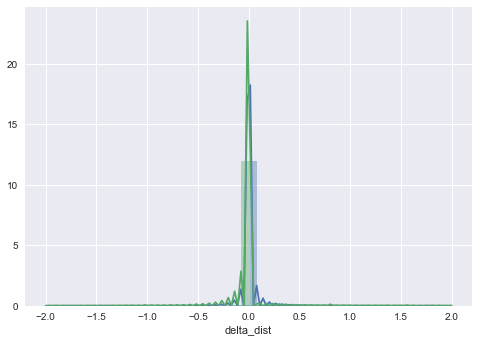

In [37]:
minorities_merged = merged_df[(merged_df['race_code']=='W') & (np.abs(merged_df['delta_dist'])<2)]
nonminorities_merged = merged_df[(merged_df['race_code']!='W') & (np.abs(merged_df['delta_dist'])<2)]
sns.distplot(minorities_merged['delta_dist']);
sns.distplot(nonminorities_merged['delta_dist']);

In [38]:
minorities_merged['delta_dist'].max()

1.9988790914256749

## Checking 2012 data

In [57]:
twenty_twelve = pd.read_csv('/Users/jakemainwaring/Downloads/2012_votes.csv')

In [58]:
twenty_twelve.head(2)

,ncid,voted_2012
0,BY25079,1.0
1,BY250876,1.0


In [59]:
merged_df.head()

,ncid,poll_changed,voted,delta_dist,voting_method,block,is_closer,is_farther,is_absentee,in_person_vote,race_code,is_minority
0,BH18756,0.0,1.0,0.0,ABSENTEE ONESTOP,0,0,0,1,0,W,0
1,BH18756,0.0,1.0,0.0,ABSENTEE ONESTOP,1,0,0,1,0,W,0
2,BH18762,0.0,1.0,0.0,ABSENTEE ONESTOP,0,0,0,1,0,W,0
3,BH18762,0.0,1.0,0.0,ABSENTEE ONESTOP,1,0,0,1,0,W,0
4,BH79589,0.0,1.0,0.0,ABSENTEE ONESTOP,0,0,0,1,0,W,0


In [60]:
twenty_twelve_merged = pd.merge(twenty_twelve, merged_df, on='ncid', how='inner')

In [61]:
twenty_twelve_merged.head(2)

,ncid,voted_2012,poll_changed,voted,delta_dist,voting_method,block,is_closer,is_farther,is_absentee,in_person_vote,race_code,is_minority
0,BY251461,1.0,0.0,1.0,0.0,ABSENTEE BY MAIL,14027,0,0,1,0,W,0
1,BY251461,1.0,0.0,1.0,0.0,ABSENTEE BY MAIL,14028,0,0,1,0,W,0


In [62]:
mod = smf.ols('voted_2012 ~ poll_changed', data=twenty_twelve_merged)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': twenty_twelve_merged['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             voted_2012   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     126.7
Date:                Tue, 14 May 2019   Prob (F-statistic):           2.50e-29
Time:                        14:15:23   Log-Likelihood:                -99061.
No. Observations:              420791   AIC:                         1.981e+05
Df Residuals:                  420789   BIC:                         1.981e+05
Df Model:                           1                                         
Covariance Type:              cluster                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8968      0.001   1370.868   

In [63]:
mod = smf.ols('voted_2012 ~ is_closer + is_farther', data=twenty_twelve_merged)
res = mod.fit(cov_type='cluster',  cov_kwds={'groups': twenty_twelve_merged['block']})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             voted_2012   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     64.01
Date:                Tue, 14 May 2019   Prob (F-statistic):           1.85e-28
Time:                        14:15:26   Log-Likelihood:                -99060.
No. Observations:              420791   AIC:                         1.981e+05
Df Residuals:                  420788   BIC:                         1.982e+05
Df Model:                           2                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8968      0.001   1370.866      0.0

In [69]:
race_dif = twenty_twelve_merged.groupby('race_code')[['voted', 'voted_2012']].mean()
race_dif['difference'] = race_dif['voted'] - race_dif['voted_2012']
race_dif

,voted,voted_2012,difference
race_code,,,
A,0.766080,0.814961,-0.048882
B,0.773047,0.913401,-0.140354
I,0.687773,0.702329,-0.014556
M,0.550582,0.866953,-0.316370
O,0.733888,0.751135,-0.017247
U,0.742082,0.862170,-0.120088
W,0.869557,0.897034,-0.027477
